# Simple example using Celery field, creates half-hourly footprint image files centered on tower location

In [1]:
import calc_footprint_FFP_climatology as ffp
import pandas as pd

# Read in data and create datetimes for saving footprints

In [2]:
df = pd.read_csv('FP_Celery.csv')
m = dict(yyyy='year', mm='month', day='day', HH_UTC='hour', MM='minute')
v = df.iloc[:, :5].rename(columns=m)
v['second'] = 0
df.index = pd.to_datetime(v)
df.index.name = 'date'
df.drop(m.keys(), 1, inplace=True)
df.head()

,zm,d,z0,u_mean,L,sigma_v,u_star,wind_dir,h_canopy,h_Measurement,z_Aerodynamic_Height
date,,,,,,,,,,,
2019-07-02 00:00:00,1.6,0.35587,0.015351,3.997896,213.0273,0.599250,0.346788,19.75525,0.1,1.6,1.24413
2019-07-02 00:30:00,1.6,0.35587,0.016223,3.658556,191.146,0.583704,0.320958,25.16525,0.1,1.6,1.24413
2019-07-02 01:00:00,1.6,0.35587,0.015078,4.098290,201.4329,0.645444,0.354050,28.53543,0.1,1.6,1.24413
2019-07-02 01:30:00,1.6,0.35587,0.015078,2.932211,106.9871,0.671792,0.267674,27.74997,0.1,1.6,1.24413
2019-07-02 02:00:00,1.6,0.35587,0.015078,1.711630,25.08041,0.373173,0.148892,18.52890,0.1,1.6,1.24413


In [3]:
# not used here but could be used to create georeferenced rasters as in AmeriFlux example
lat,long = 36.438847, -121.373706

# Calculate footprint images

Assumes boundary layer height of 2 km. The footprints in this example are only calculated for hours between 7 AM and 8 PM, this alongwith footprint array domain, resolution, and other options are all easily adjustable using the arguments to the Kljun et al. footprint function.

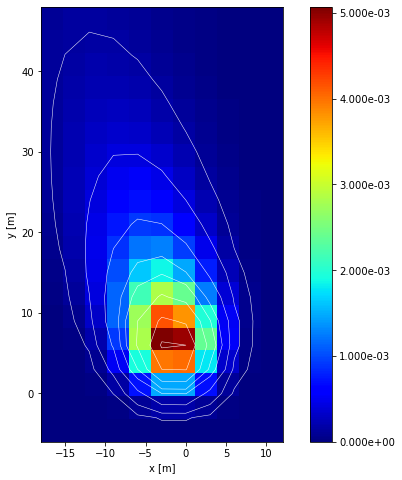

In [4]:
# domain parameters
origin_d = 75.
dx = 3.
# only doing 2 days half hourly
for i, index in enumerate(df.loc['7/2/2019':'7/4/2019'].index):
    tmp = df.loc[index,:].astype(float)
    r = ffp.FFP_climatology(
        zm=tmp.zm - tmp.d,
        z0=tmp.z0,
        umean=tmp.u_mean,
        h=2000,
        ol=tmp.L,
        sigmav=tmp.sigma_v,
        ustar=tmp.u_star,
        wind_dir=tmp.wind_dir,
        fig=True,
        domain=[-origin_d,origin_d,-origin_d,origin_d],
        dx=dx,
        dy=dx,
        crop=True,
        verbosity=1
    )
    fig = r.get('fig')
    fig.savefig('celery_out/{}.png'.format(str(tmp.name).replace(':','-').replace(' ','_')))
        

# View an example footprint image

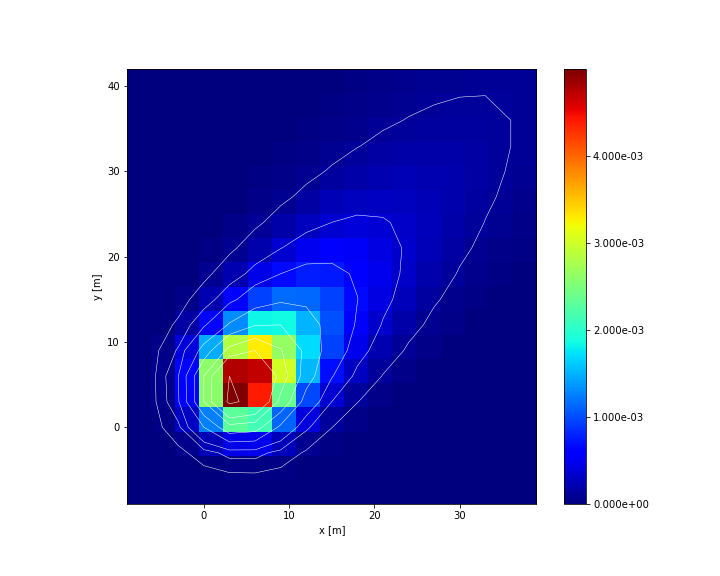

In [5]:
from IPython.display import Image
Image(filename='celery_out/2019-07-02_11-00-00.png') 